<a href="https://colab.research.google.com/github/mmartigani/RoadMapIA/blob/main/Funciones_De_Activacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [4]:
df = pd.read_csv("/content/creditcard.csv")

In [5]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


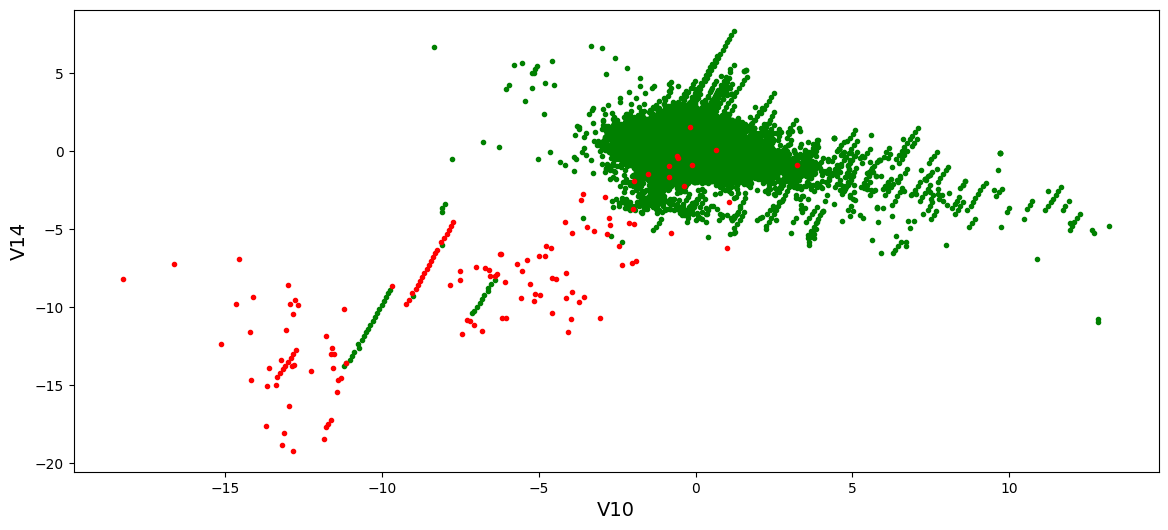

In [6]:
# Representación gráfica de dos características
plt.figure(figsize=(14, 6))
plt.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".")
plt.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".")
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

In [7]:
# Dividimos el conjunto de datos
train_set, val_set, test_set = train_val_test_split(df)

In [8]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

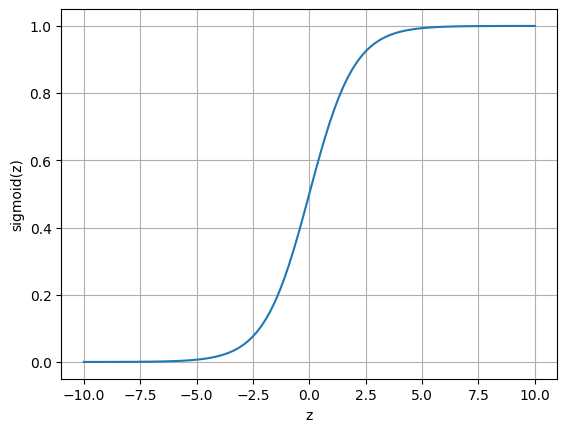

In [9]:
# Representación gráfica de la función sigmoide
from tensorflow.keras.backend import sigmoid

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()

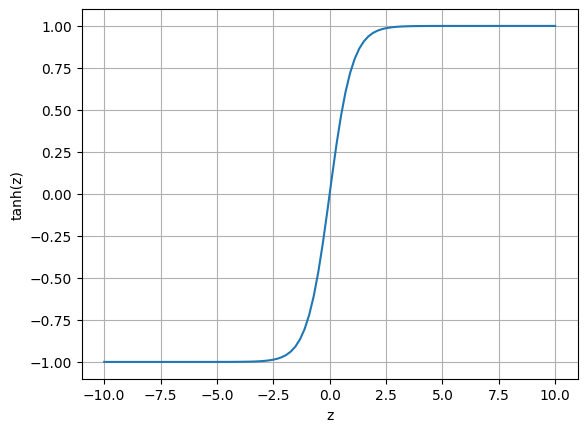

In [10]:
# Representación gráfica de la función tanh
from tensorflow.keras.backend import tanh

z = np.linspace(-10, 10, 100)
plt.plot(z, tanh(z))
plt.xlabel("z")
plt.ylabel("tanh(z)")
plt.grid()
plt.show()

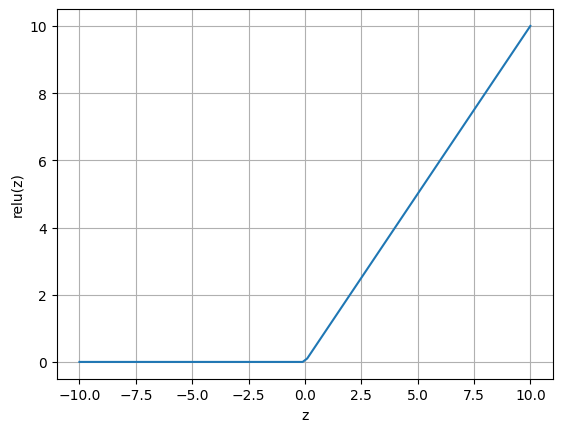

In [11]:
# Representación gráfica de la función relu
from tensorflow.keras.backend import relu

z = np.linspace(-10, 10, 100)
plt.plot(z, relu(z))
plt.xlabel("z")
plt.ylabel("relu(z)")
plt.grid()
plt.show()

In [12]:
# Reducimos el conjunto de datos y nos quedamos con las características de entrada V10 y V14
X_train_reduced = X_train[["V10", "V14"]].copy()
X_val_reduced = X_val[["V10", "V14"]].copy()
X_test_reduced = X_test[["V10", "V14"]].copy()

In [13]:
# Definición de la arquitectura de la red neuronal
from tensorflow.keras import models
from tensorflow.keras import layers

activation = "relu"

model = models.Sequential()
model.add(layers.Dense(128, activation=activation, input_shape=(X_train_reduced.shape[1],)))
model.add(layers.Dense(64, activation=activation))
model.add(layers.Dense(32, activation=activation))
model.add(layers.Dense(16, activation=activation))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Resumen de las capas del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy', 'Precision'])

In [16]:
# Entrenamos el modelo y calculamos el tiempo de ejecución
import time
start_time = time.time()

history = model.fit(X_train_reduced,
                   y_train,
                   epochs=20,
                   validation_data=(X_val_reduced, y_val))

print("\n--- Tiempo de ejecución: {} segundos ---".format(time.time() - start_time))

Epoch 1/20
856/856 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Precision: 0.0000e+00 - accuracy: 0.9954 - loss: nan - val_Precision: 0.0000e+00 - val_accuracy: 0.9974 - val_loss: nan
Epoch 2/20
856/856 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.0000e+00 - accuracy: 0.9965 - loss: nan - val_Precision: 0.0000e+00 - val_accuracy: 0.9974 - val_loss: nan
Epoch 3/20
856/856 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.0000e+00 - accuracy: 0.9973 - loss: nan - val_Precision: 0.0000e+00 - val_accuracy: 0.9974 - val_loss: nan
Epoch 4/20
856/856 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Precision: 0.0000e+00 - accuracy: 0.9970 - loss: nan - val_Precision: 0.0000e+00 - val_accuracy: 0.9974 - val_loss: nan
Epoch 5/20
856/856 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - Precision: 0.0000e+00 - accuracy: 0.9964 - loss: nan - val_Precision: 0.0000e+00 - val_accuracy: 0.9974 - val_loss: nan
Epoch 6/20
856/856 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.0000e+00 - accuracy: 0.9968 - loss: nan - val_Precision: 0.0000

In [17]:
hidden1 = model.layers[-1]

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

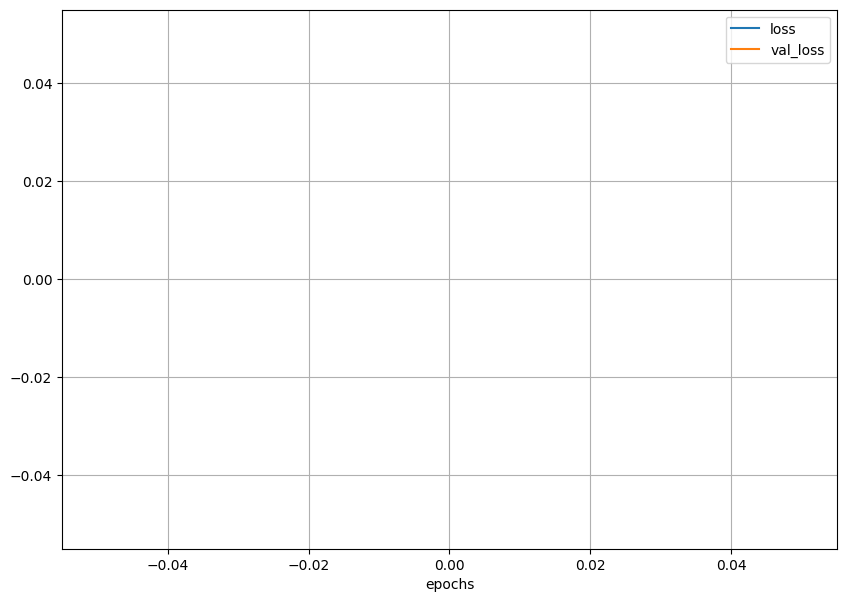

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [21]:
def plot_ann_decision_boundary(X, y, model, steps=1000):
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000

    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = labels.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)
    plt.xlabel("V10", fontsize=14)
    plt.ylabel("V14", fontsize=14)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step


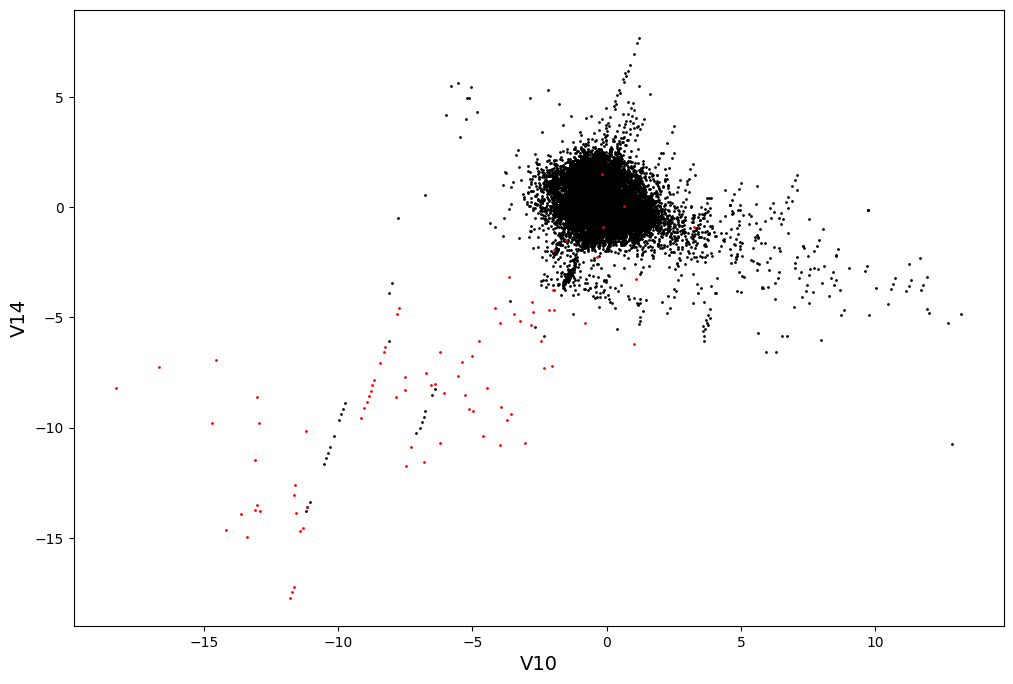

In [22]:
plt.figure(figsize=(12, 8))
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.show()

In [23]:
# Predicción con el conjunto de datos de entrenamiento
y_pred = model.predict(X_train_reduced).round(0)

856/856 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


31250/31250 ━━━━━━━━━━━━━━━━━━━━ 42s 1ms/step


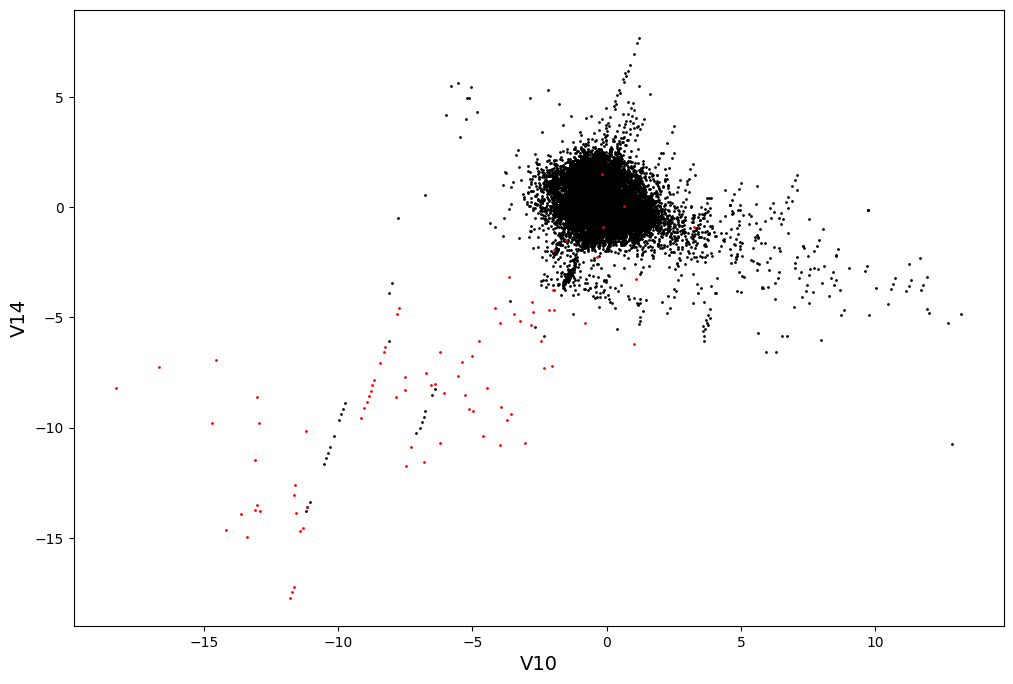

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(X_train_reduced[y_pred==1]["V10"], X_train_reduced[y_pred==1]["V14"], 'go', markersize=4)
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.show()

In [25]:
# Predicción con el conjunto de datos de prueba
y_pred = model.predict(X_test_reduced).round(0)

286/286 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
